In [67]:
#importing packages
#kernel ridge regression
import pandas as pd
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [68]:
#importing data sets
trainData= pd.read_csv("C:/Users/patsh/Downloads/QSARtrain.csv")
testData= pd.read_csv("C:/Users/patsh/Downloads/QSARtest.csv")
#trainData=trainData.drop('Unnamed:0',axis=1)
trainData.head()

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,...,numRings,numDbonds,numTbonds,numHalo,numSulf,numP,numSi,numSn,MW,logBCF
0,0,0.0,1.49,0.14,1.35,0.72,0,1,5,1,...,1,1,0,0,0,0,0,0,139.026943,0.74
1,0,0.0,1.47,0.14,1.70,0.88,0,1,5,1,...,1,1,0,0,0,0,0,0,153.042593,0.93
2,0,0.0,1.20,0.25,4.14,2.06,0,0,0,3,...,1,0,0,0,0,0,0,0,162.140851,3.24
3,0,0.0,1.69,0.13,1.89,0.79,0,1,8,3,...,1,2,0,0,0,0,0,0,168.017107,-0.40
4,0,0.0,0.52,0.25,2.65,1.31,0,0,0,1,...,1,2,0,0,0,0,0,0,108.093900,2.24


In [69]:
#separating inputs and outputs for test train data
xtrain=trainData.drop('logBCF',axis=1)
ytrain=trainData['logBCF']
xtest=testData.drop('logBCF',axis=1)
ytest=testData['logBCF']

In [70]:
#training model with training data
reg=KernelRidge(alpha=1.0)
ypred=reg.fit(xtrain, ytrain).predict(xtest)


print("Mean squared error: %.2f:" %mean_squared_error(ytest,ypred))
print("Coefficient of determination: %.2f" %r2_score(ytest,ypred))
print("RMSE: %.2f:" %mean_squared_error(ytest,ypred)**0.5)





Mean squared error: 0.47:
Coefficient of determination: 0.76
RMSE: 0.69:


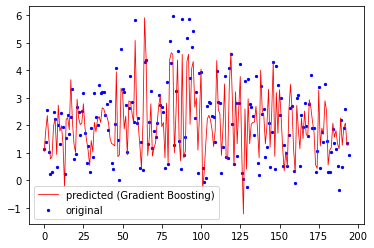

In [71]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted (Kernel Ridge)")
plt.legend()
plt.show()